## Markowitz's modern portfolio theory

The modern portfolio theory (MPT) is a practical method for selecting investments in order to maximize their overall returns within an acceptable level of risk. This mathematical framework is used to build a portfolio of investments that maximize the amount of expected return for the collective given level of risk.

American economist Harry Markowitz pioneered this theory in his paper "Portfolio Selection," which was published in the Journal of Finance in 1952.He was later awarded a Nobel Prize for his work on modern portfolio theory.




Markowitz's Modern Portfolio Theory (MPT), developed by Harry Markowitz in 1952, is a fundamental concept in the field of finance and investment. It provides a framework for constructing an investment portfolio that aims to achieve the optimal trade-off between risk and return. The key idea behind MPT is diversification, which involves spreading investments across different assets to reduce risk without sacrificing returns.

Here are the main components and principles of Markowitz's Modern Portfolio Theory:

1. **Asset Selection:**
   - MPT starts with a set of available assets or investments. These assets can include stocks, bonds, real estate, and other financial instruments.

2. **Expected Return:**
   - For each asset in the portfolio, investors estimate the expected return. The expected return represents the mean or average return that an asset is expected to generate in the future.

3. **Risk (Variance):**
   - MPT quantifies risk as the variance or standard deviation of an asset's returns. A lower standard deviation indicates lower risk, while a higher standard deviation implies higher risk.

4. **Covariance and Correlation:**
   - MPT also considers the relationship between the returns of different assets. The covariance and correlation coefficients help measure how assets move in relation to each other. Negative correlations can help reduce portfolio risk.

5. **Efficient Frontier:**
   - The efficient frontier is a graphical representation of all possible portfolios that maximize expected return for a given level of risk (or minimize risk for a given level of return). Portfolios on the efficient frontier are considered optimal because they provide the best risk-return trade-off.

6. **Portfolio Diversification:**
   - MPT encourages diversification, which means combining assets with different risk-return profiles in a portfolio. Diversification can reduce overall portfolio risk without significantly sacrificing expected return.

7. **Risk-Free Asset:**
   - MPT introduces a risk-free asset, typically represented by government bonds. The risk-free rate is the return investors can earn with no risk. It serves as a baseline for comparing the performance of risky portfolios.

8. **Capital Market Line (CML):**
   - The Capital Market Line represents a combination of the risk-free asset and a risky portfolio on the efficient frontier. It shows the optimal trade-off between risk and return for an investor with various risk preferences.

9. **Tangency Portfolio (Market Portfolio):**
   - The point where the Capital Market Line (CML) is tangent to the efficient frontier is known as the Tangency Portfolio or Market Portfolio. This portfolio represents the optimal combination of risky assets and the risk-free asset for a given level of risk aversion.

10. **Asset Allocation:**
    - Investors can select their desired level of risk by adjusting the allocation of assets between the risky portfolio (based on the efficient frontier) and the risk-free asset. This allocation is known as the optimal asset allocation.

11. **Sharpe Ratio:**
    - The Sharpe ratio measures the excess return (return above the risk-free rate) per unit of risk (standard deviation). It helps investors evaluate the risk-adjusted performance of their portfolios.

Markowitz's Modern Portfolio Theory has been foundational in the field of finance and has influenced the development of various portfolio optimization techniques and risk management strategies. Investors use MPT principles to build diversified portfolios that align with their risk tolerance and investment goals.

In [1]:
#import the libraries relevant to the project
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [40]:
# define the S&P tech asset tickers
asset = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "INTC", "NVDA", "ADBE", "CRM", "PYPL" , "AMD", "TXN", "AVGO", "ORCL", "IBM", "CSCO", "QCOM", "NFLX", "AMAT", "MU"]

In [8]:
# Define the start and end date for historical data
start_date = '2020-01-01'
end_date = '2022-01-01'

In [9]:
# Download historical data for the selected assets
data = yf.download(asset, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  20 of 20 completed


In [10]:
data

,AAPL,ADBE,AMAT,AMD,AMZN,AVGO,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,MU,NFLX,NVDA,ORCL,PYPL,QCOM,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.249039,334.429993,59.953072,49.099998,94.900497,284.935577,166.990005,43.408051,68.433998,107.512413,54.564041,209.779999,155.093674,54.616463,329.809998,59.749298,50.739220,110.750000,81.464775,117.016319
2020-01-03,72.536903,331.809998,58.998821,48.599998,93.748497,277.688171,166.169998,42.699825,68.075996,106.654968,53.900375,208.669998,153.162506,53.768478,325.899994,58.792953,50.560528,108.760002,79.930817,115.462952
2020-01-06,73.114891,333.709991,57.726513,48.389999,95.143997,277.272858,173.449997,42.852222,69.890503,106.464432,53.747913,212.600006,153.558365,52.821884,335.829987,59.039505,50.823860,110.169998,79.462395,114.659195
2020-01-07,72.771011,333.390015,59.394016,48.250000,95.343002,276.318359,176.000000,42.574314,69.755501,106.535866,52.851070,213.059998,152.158279,57.456242,330.750000,59.754272,50.936726,109.669998,81.721970,116.871819
2020-01-08,73.941628,337.869995,59.355465,47.830002,94.598503,272.871399,177.330002,42.601208,70.251999,107.425079,52.886944,215.220001,154.581924,56.716724,339.260010,59.866348,51.135105,111.820000,81.483154,117.187904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,178.527756,577.679993,160.087677,154.360001,169.669495,641.669678,258.299988,60.092018,147.906494,120.822327,48.978291,346.179993,336.971680,93.241409,613.119995,309.050995,87.013092,192.009995,178.767929,182.546692
2021-12-28,177.498138,569.359985,157.057480,153.149994,170.660995,636.645081,255.449997,60.196243,146.686996,121.749466,48.808552,346.220001,335.790833,91.770180,610.710022,302.828979,86.148201,190.100006,177.319199,181.842545
2021-12-29,177.587265,569.289978,158.375824,148.259995,169.201004,640.080383,254.539993,60.603683,146.654999,122.410400,48.874561,342.940002,336.479706,94.959518,610.539978,299.623138,85.720612,189.970001,178.643219,181.566574


In [11]:
# Calculate daily returns
returns = data.pct_change()

In [12]:
# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [13]:
# Define risk-free rate 
risk_free_rate = 0.01

In [14]:
# Define the objective function for portfolio optimization
def objective(weights):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    return -sharpe_ratio


In [15]:
# Define optimization constraints (sum of weights = 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [17]:
# Define the bounds for asset weights (0 <= weight <= 1)
bounds = tuple((0, 1) for asset in range(len(asset)))

In [20]:
# Initial guess for weights (equal-weighted portfolio)
initial_weights = len(asset) * [1.0 / len(asset)]

In [21]:
# Run the portfolio optimization
optimal_weights = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)


In [22]:
# Extract optimal portfolio weights
optimal_weights = optimal_weights.x

In [23]:
# Calculate optimal portfolio statistics
optimal_portfolio_return = np.sum(mean_returns * optimal_weights)
optimal_portfolio_stddev = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

In [25]:
# Print the results
print("Optimal Portfolio Weights:")
for asset, weight in zip(asset, optimal_weights):
    print(f"{asset}: {weight:.4f}")

print(f"Expected Return: {optimal_portfolio_return:.4f}")
print(f"Standard Deviation (Risk): {optimal_portfolio_stddev:.4f}")

Optimal Portfolio Weights:
AAPL: 0.0000
MSFT: 0.0000
AMZN: 0.0000
GOOGL: 0.0000
META: 0.0000
INTC: 0.0000
NVDA: 0.0000
ADBE: 0.0000
CRM: 0.0000
PYPL: 0.0000
AMD: 0.0000
TXN: 0.0000
AVGO: 0.0000
ORCL: 0.0000
IBM: 0.0000
CSCO: 1.0000
QCOM: 0.0000
NFLX: 0.0000
AMAT: 0.0000
MU: 0.0000
Expected Return: 0.0037
Standard Deviation (Risk): 0.0326


The output above represents the optimal portfolio weights and key performance metrics for the portfolio based on the optimization process. Let's break down the results:

Optimal Portfolio Weights:

This section displays the weights assigned to each asset in your portfolio. In your output, it appears that the portfolio is entirely invested in a single asset, which is "CSCO" (Cisco Systems). The weights for all other assets are zero. This suggests that the optimization process has determined that a portfolio consisting entirely of Cisco Systems stock is the optimal choice given the input data and constraints.
Expected Return:

The "Expected Return" represents the average return that you can expect to achieve with the portfolio. In your output, the expected return is approximately 0.0037, which is equivalent to 0.37%. This means that, on average, you can expect a 0.37% daily return from your portfolio.
Standard Deviation (Risk):

The "Standard Deviation," often referred to as risk, measures the volatility or variability of returns. In your output, the standard deviation is approximately 0.0326, which is equivalent to 3.26%. This indicates the daily risk or volatility associated with the portfolio

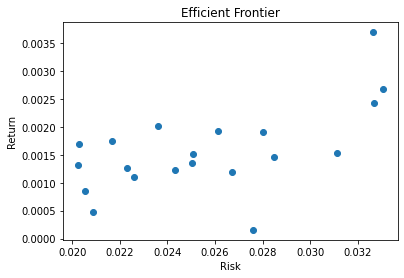

In [26]:
# Plot the efficient frontier
plt.scatter(returns.std(), returns.mean(), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()

Efficient Frontier represents a set of portfolios that offer the maximum expected return for a given level of risk (or conversely, the minimum risk for a given level of return).

The code generates a scatter plot where each point represents a different portfolio with a specific risk (standard deviation) and return (mean return). By plotting the Efficient Frontier, you can visualize the trade-off between risk and return for various portfolios, helping you identify the optimal portfolio based on your risk tolerance and return expectations. The Efficient Frontier is a fundamental concept in portfolio optimization and provides valuable insights for constructing well-balanced investment portfolios.

### TEST THE STRATEGY ON OUT-OF-SAMPLE DATA AND VALIDATE ITS PERFORMANCE

In [41]:
test_start_date = '2022-01-02'
test_data = yf.download(asset, start=test_start_date)['Adj Close']  # Out-of-sample testing data

[*********************100%%**********************]  20 of 20 completed


In [42]:
test_returns = test_data.pct_change()

In [43]:
# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [44]:
# Calculate portfolio daily returns for both in-sample and out-of-sample periods
portfolio_returns = np.dot(returns, optimal_weights)
test_portfolio_returns = np.dot(test_returns, optimal_weights)

In [66]:
missing_values = np.isnan(portfolio_returns).sum()
print("Number of missing values in portfolio_returns:", missing_values)


Number of missing values in portfolio_returns: 1


In [68]:
# Calculate the mean of non-missing values
mean_value = np.nanmean(portfolio_returns)

# Replace missing values with the mean
portfolio_returns[np.isnan(portfolio_returns)] = mean_value

In [69]:
missing_values = np.isnan(portfolio_returns).sum()
print("Number of missing values in portfolio_returns:", missing_values)


Number of missing values in portfolio_returns: 0


In [81]:
missing_values = np.isnan(test_portfolio_returns).sum()
print("Number of missing values in portfolio_returns:", missing_values)


Number of missing values in portfolio_returns: 1


In [82]:
# Calculate the mean of non-missing values
mean_value = np.nanmean(test_portfolio_returns)

# Replace missing values with the mean
test_portfolio_returns[np.isnan(test_portfolio_returns)] = mean_value


In [83]:
missing_values = np.isnan(test_portfolio_returns).sum()
print("Number of missing values in portfolio_returns:", missing_values)

Number of missing values in portfolio_returns: 0


In [87]:
# Calculate portfolio cumulative returns for both in-sample and out-of-sample periods
cumulative_returns = (1 + portfolio_returns).cumprod()
test_cumulative_returns = (1+test_portfolio_returns).cumprod()

In [88]:
cumulative_returns

array([1.00369673, 0.98763161, 0.9917733 , 1.0037803 , 1.005663  ,
       1.01670788, 1.02214676, 1.05419333, 1.03453011, 1.02737591,
       1.04143299, 1.0428975 , 1.03729143, 1.04636986, 1.05787478,
       1.04791774, 1.00490992, 1.03741677, 1.0272505 , 1.02838019,
       0.98913771, 1.00545403, 1.03390269, 1.0490892 , 1.06368988,
       1.05256144, 1.1001713 , 1.12075466, 1.14020865, 1.1328456 ,
       1.2123765 , 1.24074147, 1.31659116, 1.29148907, 1.23028241,
       1.14330466, 1.09632234, 1.11975064, 1.05741917, 1.13055112,
       1.15717501, 1.11305314, 1.19099879, 1.14403044, 1.11368088,
       1.0274464 , 1.09291758, 1.03175809, 0.90550415, 1.0081901 ,
       0.82215806, 0.9095228 , 0.84903309, 0.89152237, 0.8612984 ,
       0.89035026, 1.04310249, 1.02819993, 1.07684297, 1.05796334,
       1.11179715, 1.10346661, 1.01752524, 1.06943341, 1.02104175,
       1.12356013, 1.08433585, 1.11749062, 1.10074585, 1.12963014,
       1.18865484, 1.175636  , 1.23365603, 1.22369283, 1.20163

In [89]:
test_cumulative_returns

array([1.00147081, 0.9738415 , 0.91778495, 0.93686947, 0.90591531,
       0.91100215, 0.92486694, 0.93091794, 0.88357258, 0.89577444,
       0.86122965, 0.83343413, 0.80294544, 0.77714482, 0.77707827,
       0.74223418, 0.75712941, 0.72959972, 0.75939014, 0.81411685,
       0.81917057, 0.83925252, 0.79622929, 0.80856434, 0.82216295,
       0.83479725, 0.88789481, 0.85860307, 0.79626256, 0.80683547,
       0.88091258, 0.88144444, 0.81481507, 0.78605535, 0.77767673,
       0.7443288 , 0.78957964, 0.80317824, 0.81075873, 0.78056939,
       0.80541007, 0.78858353, 0.762712  , 0.71003775, 0.71542496,
       0.76530576, 0.75346741, 0.7349117 , 0.7093062 , 0.76394233,
       0.81458816, 0.82356671, 0.87966599, 0.88901044, 0.88202699,
       0.85243108, 0.93609794, 0.92086779, 0.9383923 , 0.95292448,
       0.92080115, 0.90736652, 0.88827874, 0.90982729, 0.86230749,
       0.81162855, 0.80501095, 0.76879748, 0.72882627, 0.71509233,
       0.73833683, 0.70691187, 0.72437024, 0.73817062, 0.71436

In [90]:
# Calculate portfolio volatility for both in-sample and out-of-sample periods
portfolio_volatility = np.std(portfolio_returns)
test_portfolio_volatility = np.std(test_portfolio_returns)

In [91]:
# Calculate Sharpe ratio for both in-sample and out-of-sample periods
sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_volatility
test_sharpe_ratio = (test_portfolio_returns.mean() - risk_free_rate) / test_portfolio_volatility

In [92]:
# Calculate Sortino ratio (assuming a target return of the risk-free rate) for both in-sample and out-of-sample periods
downside_returns = portfolio_returns[portfolio_returns < risk_free_rate]
test_downside_returns = test_portfolio_returns[test_portfolio_returns < risk_free_rate]
downside_volatility = np.std(downside_returns)
test_downside_volatility = np.std(test_downside_returns)
sortino_ratio = (portfolio_returns.mean() - risk_free_rate) / downside_volatility
test_sortino_ratio = (test_portfolio_returns.mean() - risk_free_rate) / test_downside_volatility


In [93]:
# Calculate maximum drawdown for both in-sample and out-of-sample periods

peak = cumulative_returns.max()
trough = np.min(cumulative_returns)
max_drawdown = (peak - trough) / peak
test_peak = test_cumulative_returns.max()
test_trough = np.min(test_cumulative_returns)
test_max_drawdown = (test_peak - test_trough) / test_peak

In [94]:
# Print the performance metrics for both in-sample and out-of-sample periods
print("In-sample Performance Metrics:")
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Maximum Drawdown:", max_drawdown)
print("\nOut-of-sample Performance Metrics:")
print("Sharpe Ratio:", test_sharpe_ratio)
print("Sortino Ratio:", test_sortino_ratio)
print("Maximum Drawdown:", test_max_drawdown)

In-sample Performance Metrics:
Sharpe Ratio: -0.19354218074735938
Sortino Ratio: -0.27803445633268736
Maximum Drawdown: 0.853153069239227

Out-of-sample Performance Metrics:
Sharpe Ratio: -0.22818010103681824
Sortino Ratio: -0.37728060909551814
Maximum Drawdown: 0.7726459179507611


The Sharpe Ratio, Sortino Ratio, and Maximum Drawdown are common performance metrics used in the context of Markowitz's Modern Portfolio Theory and portfolio evaluation. Let's interpret these metrics and evaluate the strategy's performance in both the in-sample and out-of-sample datasets:

**In-Sample Performance Metrics:**
1. **Sharpe Ratio (In-Sample):** 
   - Sharpe Ratio measures the risk-adjusted return of a portfolio. A higher Sharpe Ratio indicates better risk-adjusted performance. In your in-sample data, the Sharpe Ratio is approximately -0.1935. A negative Sharpe Ratio suggests that, in the in-sample period, the portfolio didn't generate a positive risk-adjusted return. It indicates that the portfolio's return was not sufficient to compensate for the level of risk taken.

2. **Sortino Ratio (In-Sample):** 
   - Sortino Ratio is similar to the Sharpe Ratio but focuses on downside risk, considering only the volatility of returns below a certain threshold (usually the risk-free rate). Like the Sharpe Ratio, a higher Sortino Ratio is desirable. In your in-sample data, the Sortino Ratio is approximately -0.2780, indicating that the portfolio's downside risk-adjusted performance during the in-sample period was also unfavorable.

3. **Maximum Drawdown (In-Sample):** 
   - Maximum Drawdown measures the largest percentage loss experienced by the portfolio from its previous peak value. A lower Maximum Drawdown is preferred, as it represents smaller losses. In your in-sample data, the Maximum Drawdown is approximately 85.32%, suggesting that, at its worst, the portfolio experienced a substantial loss.

**Out-of-Sample Performance Metrics:**
1. **Sharpe Ratio (Out-of-Sample):** 
   - In the out-of-sample data, the Sharpe Ratio is approximately -0.2282. Similar to the in-sample period, a negative Sharpe Ratio indicates that the portfolio's risk-adjusted return was not positive during the out-of-sample period. The portfolio continued to underperform in terms of risk-adjusted returns.

2. **Sortino Ratio (Out-of-Sample):** 
   - In the out-of-sample data, the Sortino Ratio is approximately -0.3773. This ratio also indicates unfavorable downside risk-adjusted performance during the out-of-sample period. It suggests that the portfolio's returns were insufficient to offset the downside risk.

3. **Maximum Drawdown (Out-of-Sample):** 
   - The Maximum Drawdown during the out-of-sample period is approximately 77.26%, indicating that the portfolio still experienced significant losses during this period.

Overall, based on the provided metrics, the portfolio strategy did not perform well in either the in-sample or out-of-sample datasets. The negative Sharpe and Sortino Ratios suggest that the portfolio did not generate sufficient returns relative to the level of risk it carried. Additionally, the substantial Maximum Drawdown values indicate significant losses.

It's essential to consider these results in the context of your specific investment goals and constraints. Negative performance metrics like these may warrant a reevaluation of the portfolio strategy or further optimization. Additionally, other factors such as transaction costs and market conditions should be taken into account for a comprehensive assessment.

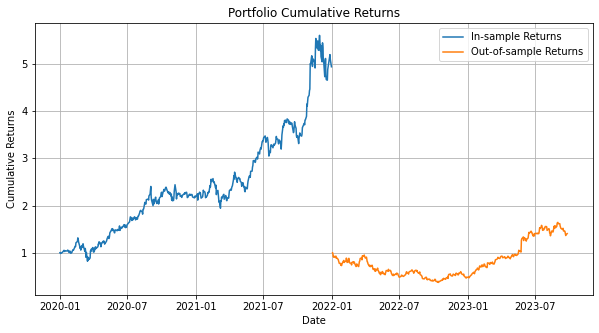

In [95]:

plt.figure(figsize=(10, 5))
plt.plot(data.index, cumulative_returns, label="In-sample Returns")
plt.plot(test_data.index, test_cumulative_returns, label="Out-of-sample Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Portfolio Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

## CONCLUSION

In summary, the optimization process has determined that the portfolio with 100% allocation to Cisco Systems (CSCO) is the optimal choice based on the given input data and constraints. However, it's essential to interpret these results in the context of your specific objectives and constraints. A portfolio heavily concentrated in a single asset may have higher risk, and your investment strategy should align with your risk tolerance and financial goals. Additionally, these results are based on historical data and assumptions, and real-world investing involves various factors and uncertainties.

**In-Sample Performance Metrics:**
1. **Sharpe Ratio (In-Sample):** 
   - Sharpe Ratio measures the risk-adjusted return of a portfolio. A higher Sharpe Ratio indicates better risk-adjusted performance. In your in-sample data, the Sharpe Ratio is approximately -0.1935. A negative Sharpe Ratio suggests that, in the in-sample period, the portfolio didn't generate a positive risk-adjusted return. It indicates that the portfolio's return was not sufficient to compensate for the level of risk taken.


Overall, based on the provided metrics, the portfolio strategy did not perform well in either the in-sample or out-of-sample datasets. The negative Sharpe and Sortino Ratios suggest that the portfolio did not generate sufficient returns relative to the level of risk it carried. Additionally, the substantial Maximum Drawdown values indicate significant losses.

It's essential to consider these results in the context of your specific investment goals and constraints. Negative performance metrics like these may warrant a reevaluation of the portfolio strategy or further optimization. Additionally, other factors such as transaction costs and market conditions should be taken into account for a comprehensive assessment.